In [1]:
#importing all the necessary libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# Reading the dataset
df = pd.read_csv("C:\\Users\\visio\\Downloads\\forbes_dataset.csv")

In [3]:
# 5 first rows of the dataset
df.head()

,Rank,Name,Net Worth,Change,Percentage Change,Age,Source,Country/Territory
0,1,Elon Musk,$405.6 B,$6.1 B,1.52%,54,"Tesla, SpaceX",United States
1,2,Larry Ellison,$290.6 B,$2.9 B,1.01%,80,Oracle,United States
2,3,Mark Zuckerberg,$245.9 B,$724 M,-0.29%,41,Facebook,United States
3,4,Jeff Bezos,$244.0 B,$715 M,-0.29%,61,Amazon,United States
4,5,Larry Page,$158.9 B,$734 M,0.46%,52,Google,United States


In [4]:
# Describing the dataset
df.describe()

,Rank,Age
count,1556.000000,1556.000000
mean,788.143316,67.019923
std,455.137426,13.772716
min,1.000000,20.000000
25%,396.750000,58.000000
50%,788.500000,68.000000
75%,1181.250000,77.000000
max,1575.000000,101.000000


In [5]:
# data types 
df.dtypes

Rank                  int64
Name                 object
Net Worth            object
Change               object
Percentage Change    object
Age                   int64
Source               object
Country/Territory    object
dtype: object

In [6]:
df.count()

Rank                 1556
Name                 1556
Net Worth            1556
Change               1556
Percentage Change    1556
Age                  1556
Source               1556
Country/Territory    1556
dtype: int64

In [7]:
# making a copy of the dataset
dfType=df.copy()

In [8]:
# Displaying data types
dfType.dtypes

Rank                  int64
Name                 object
Net Worth            object
Change               object
Percentage Change    object
Age                   int64
Source               object
Country/Territory    object
dtype: object

In [9]:
# Convert columns to appropriate data types and clean up string columns
dfType['Age']= dfType['Age'].astype('int64')
dfType['Source']= dfType['Source'].astype('category')
dfType['Country/Territory']= dfType['Country/Territory'].astype('category')
dfType['Net Worth (B)'] = dfType['Net Worth'].replace( {'\\$': '', ' B': '', 'M': '', ',': ''}, regex=True).astype(float)
dfType['Change'] = dfType['Change'].replace({'\\$': '', ' B': '', 'M': '', ',': ''}, regex=True).astype(float)
dfType['Percentage Change (%)'] = dfType['Percentage Change'].replace({'%': ''}, regex=True).astype(float)
dfType['Name'] = dfType['Name'].astype('string')
dfType.drop(columns=['Net Worth', 'Percentage Change'], inplace=True)

In [10]:
dfType.dtypes

Rank                              int64
Name                     string[python]
Change                          float64
Age                               int64
Source                         category
Country/Territory              category
Net Worth (B)                   float64
Percentage Change (%)           float64
dtype: object

In [11]:
# Checking for null values
df.isnull().sum().sum()

0

<Axes: title={'center': 'Distribution of Billionaires by Age'}, xlabel='Age', ylabel='Count'>

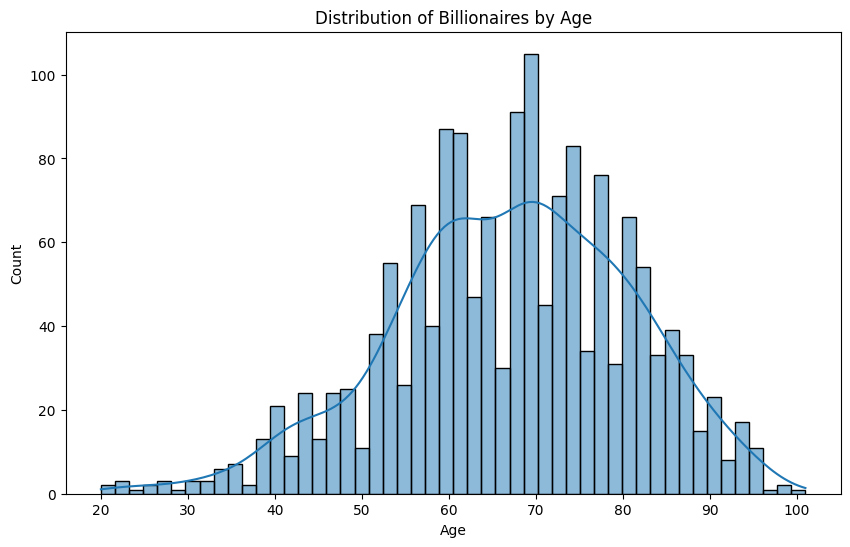

In [12]:

plt.figure(figsize=(10, 6))
plt.title('Distribution of Billionaires by Age')
sns.histplot(dfType['Age'], bins=50, kde=True)

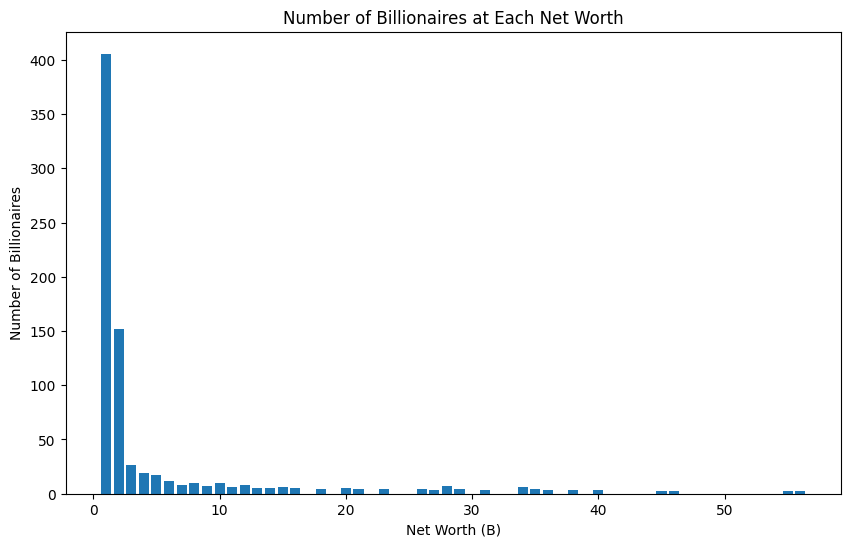

In [13]:
networth_counts = dfType['Net Worth (B)'].value_counts().sort_index()
# Plotting the number of billionaires at each net worth
plt.figure(figsize=(10, 6))
plt.bar(networth_counts.values, networth_counts.index, width=0.8)
plt.xlabel('Net Worth (B)')
plt.ylabel('Number of Billionaires')
plt.title('Number of Billionaires at Each Net Worth')
plt.show()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65],
 [Text(0, 0, 'Algeria'),
  Text(1, 0, 'Argentina'),
  Text(2, 0, 'Australia'),
  Text(3, 0, 'Austria'),
  Text(4, 0, 'Belgium'),
  Text(5, 0, 'Belize'),
  Text(6, 0, 'Brazil'),
  Text(7, 0, 'Bulgaria'),
  Text(8, 0, 'Canada'),
  Text(9, 0, 'Chile'),
  Text(10, 0, 'China'),
  Text(11, 0, 'Colombia'),
  Text(12, 0, 'Cyprus'),
  Text(13, 0, 'Czech Republic'),
  Text(14, 0, 'Denmark'),
  Text(15, 0, 'Egypt'),
  Text(16, 0, 'Estonia'),
  Text(17, 0, 'Eswatini (Swaziland)'),
  Text(18, 0, 'Finland'),
  Text(19, 0, 'France'),
  Text(20, 0, 'Georgia'),
  Text(21, 0, 'Germany'),
  Text(22, 0, 'Greece'),
  Text(23, 

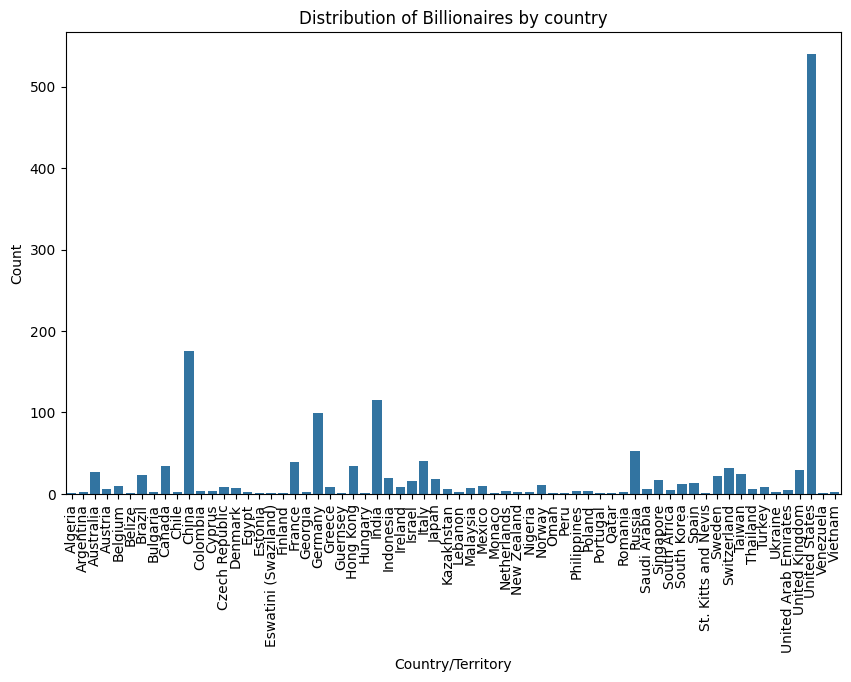

In [14]:
# Plotting the distribution of billionaires by country
plt.figure(figsize=(10, 6))
plt.title('Distribution of Billionaires by country')
sns.countplot(x='Country/Territory', data=dfType)
plt.ylabel('Count')
plt.xlabel('Country/Territory')
plt.xticks(rotation=90)

In [15]:
# Finding the most probable age to become a billionaire
most_probable_age = dfType['Age'].mode()[0]
print(f"The most probable age to become a billionaire is {most_probable_age}.")

The most probable age to become a billionaire is 70.


In [16]:
# Calculating the mean and standard deviation of age
std_age = dfType['Age'].std()
print(f"Standard deviation of age: {std_age}")

Standard deviation of age: 13.772715989140314


In [17]:
# Calculating the median age of billionaires
median_age = dfType['Age'].median()
print(f"The median age of billionaires is {median_age}.")

The median age of billionaires is 68.0.


In [18]:
# Finding the country with the most billionaires
country_with_most_billionaires= dfType['Country/Territory'].mode()[0]
print(f"Country with the most billionaires: {country_with_most_billionaires} with {dfType['Country/Territory'].value_counts().max()} billionaires.")

Country with the most billionaires: United States with 540 billionaires.


In [19]:
# Correlation between Age and Net Worth (B)
correlation = dfType['Age'].corr(dfType['Net Worth (B)'])
print(f"Correlation between Age and Net Worth (B): {correlation:.3f}")

Correlation between Age and Net Worth (B): 0.015


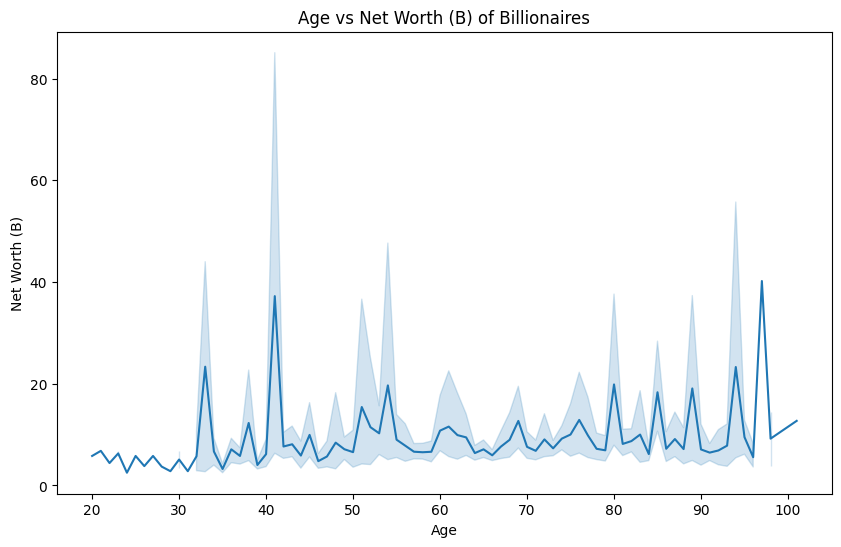

In [20]:
# Plotting Age vs Net Worth (B)
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='Net Worth (B)', data=dfType)
plt.title('Age vs Net Worth (B) of Billionaires')
plt.xlabel('Age')
plt.ylabel('Net Worth (B)')
plt.show()

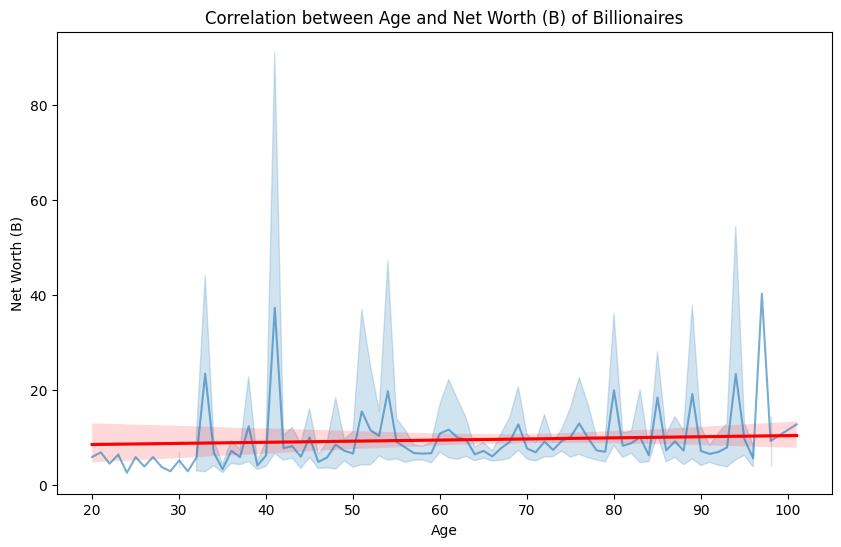

In [21]:
# Plotting the correlation between Age and Net Worth (B)
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='Net Worth (B)', data=dfType, alpha=0.6)
sns.regplot(x='Age', y='Net Worth (B)', data=dfType, scatter=False, color='red')
plt.title('Correlation between Age and Net Worth (B) of Billionaires')
plt.xlabel('Age')
plt.ylabel('Net Worth (B)')
plt.show()

🧠 Clustering Billionaires with K-Means: Step-by-Step


In [22]:
encoder = LabelEncoder()
dfType['Category_Code'] = encoder.fit_transform(dfType['Source'])

# Select features
features = dfType[['Net Worth (B)', 'Age', 'Category_Code']]

In [23]:

scaler = StandardScaler()
scaled_features = scaler.fit_transform(dfType[['Net Worth (B)', 'Age', 'Category_Code']])


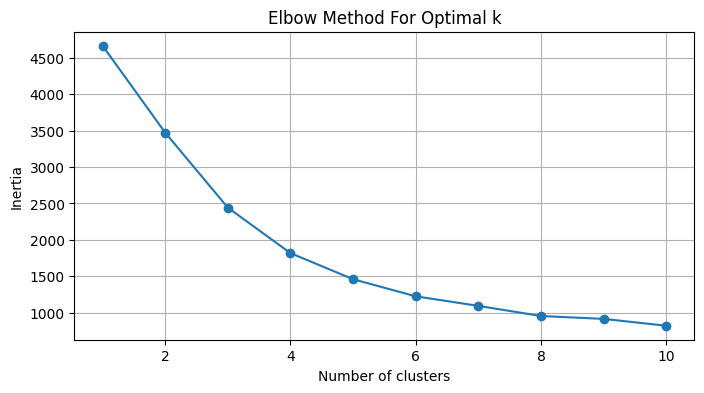

In [24]:

# Using the Elbow Method to find the optimal number of clusters
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [25]:
# Applying KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=4, random_state=42)
dfType['Cluster'] = kmeans.fit_predict(scaled_features)


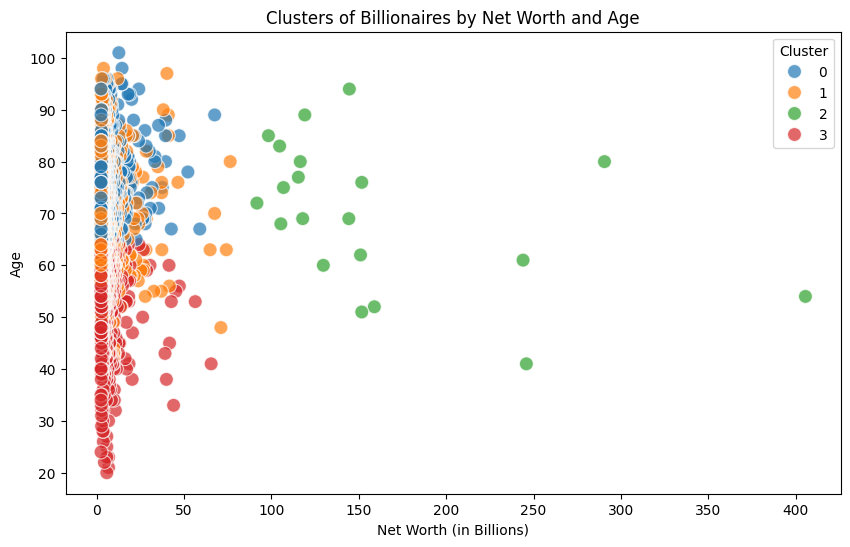

In [26]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=dfType, x='Net Worth (B)', y='Age', hue='Cluster', palette='tab10', s=100, alpha=0.7)
plt.title('Clusters of Billionaires by Net Worth and Age')
plt.xlabel('Net Worth (in Billions)')
plt.ylabel('Age')
plt.legend(title='Cluster')
plt.show()


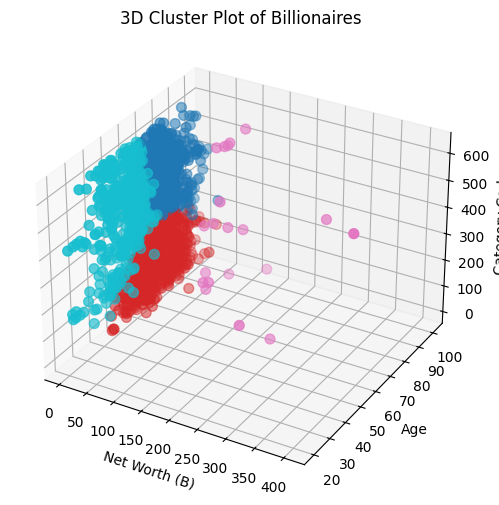

In [27]:
# Plotting the clusters in 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    dfType['Net Worth (B)'], df['Age'], dfType['Category_Code'],
    c=dfType['Cluster'], cmap='tab10', s=50
)

ax.set_xlabel('Net Worth (B)')
ax.set_ylabel('Age')
ax.set_zlabel('Category Code')
plt.title('3D Cluster Plot of Billionaires')
plt.show()


In [28]:
# Cluster summary statistics
cluster_summary = dfType.groupby('Cluster')[['Net Worth (B)', 'Age', 'Category_Code']].mean()
print(cluster_summary)


         Net Worth (B)        Age  Category_Code
Cluster                                         
0             8.028195  76.549696     439.430020
1             7.748299  70.292517     140.734694
2           159.695000  69.900000     338.550000
3             6.898901  52.338462     406.984615


In [29]:
# Example new data for prediction
new_data = pd.DataFrame({
    'Net Worth (B)': [10.5],
    'Age': [45],
    'Source': ['Technology']
})

# Encode 'Source' using the previously fitted encoder
new_data['Category_Code'] = encoder.transform(new_data['Source'])

# Scale features using the previously fitted scaler
new_scaled = scaler.transform(new_data[['Net Worth (B)', 'Age', 'Category_Code']])

# Predict cluster for the new data
predicted_cluster = kmeans.predict(new_scaled)
print(f"Predicted cluster for the new data: {predicted_cluster[0]}")


Predicted cluster for the new data: 3


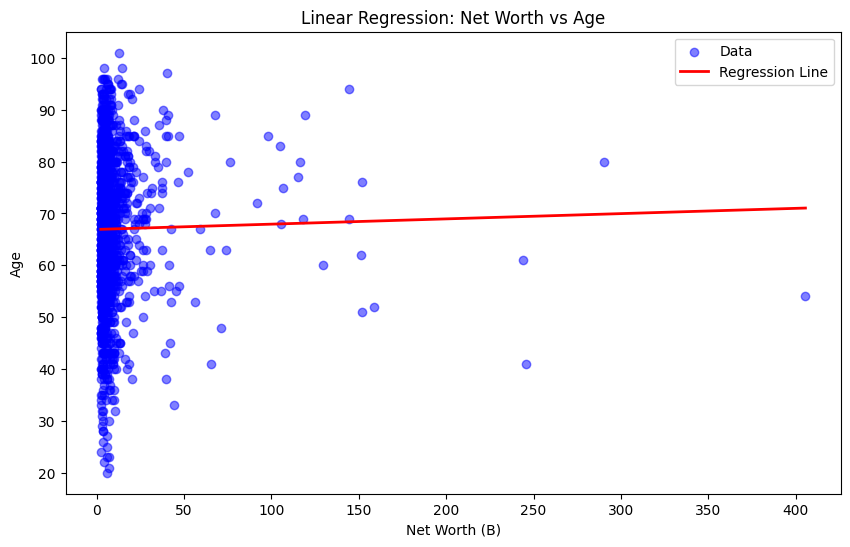

Predicted age for a net worth of $50B: 67.43


c:\Users\visio\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [31]:
from sklearn.linear_model import LinearRegression

# Prepare features and target
X = dfType[['Net Worth (B)']]
y = dfType['Age']

# Fit linear regression model
reg = LinearRegression()
reg.fit(X, y)
# Plot regression line and data points
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.5, label='Data')
plt.plot(X, reg.predict(X), color='red', linewidth=2, label='Regression Line')
plt.xlabel('Net Worth (B)')
plt.ylabel('Age')
plt.title('Linear Regression: Net Worth vs Age')
plt.legend()
plt.show()
# Example: Predict age for a given net worth (e.g., $50B)
predicted_age = reg.predict([[50]])
print(f"Predicted age for a net worth of $50B: {predicted_age[0]:.2f}")

In [33]:
from sklearn.linear_model import LogisticRegression

X=dfType[['Net Worth (B)']]
y=dfType['Age']
logReg= LogisticRegression()
logReg.fit(X,y)

predicted_age = logReg.predict([[50]])
print(f"Predicted age for a net worth of $50B: {predicted_age[0]}")

Predicted age for a net worth of $50B: 69


c:\Users\visio\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\visio\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
